## Setup

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch

## Example

In [5]:
df = pd.read_csv("https://sta663-sp23.github.io/slides/data/gp.csv")
X = torch.tensor(df["x"], dtype=torch.float32).reshape(-1,1)
y = torch.tensor(df["y"], dtype=torch.float32)

In [6]:
class lin_reg(torch.nn.Module):
    def __init__(self, X):
        super().__init__()
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.model = torch.nn.Sequential(
          torch.nn.Linear(self.p, self.p)
        )
    
    def forward(self, X):
        return self.model(X)
    
    def fit(self, X, y, n=1000):
      losses = []
      opt = torch.optim.SGD(self.parameters(), lr=0.001, momentum=0.9)
      for i in range(n):
          loss = torch.nn.MSELoss()(self(X).squeeze(), y)
          loss.backward()
          opt.step()
          opt.zero_grad()
          losses.append(loss.item())
      
      return losses

In [9]:
m = lin_reg(X)
loss = m.fit(X,y, n=2000)

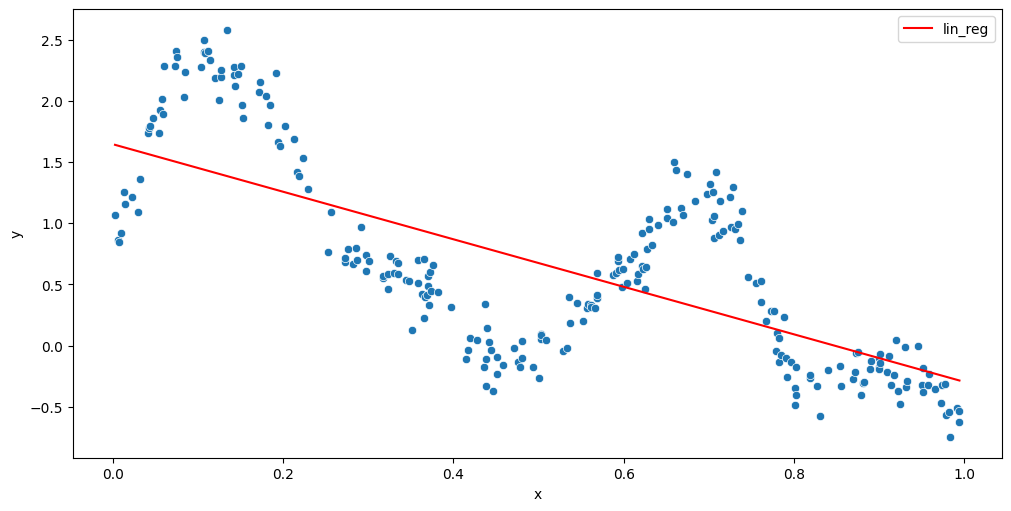

In [12]:
plt.figure(figsize=(10,5), layout="constrained")
sns.scatterplot(data=df, x="x", y="y")
plt.plot(
  X.numpy().flatten(),
  m(X).detach().numpy().flatten(),
  "-r",
  label="lin_reg"
)
plt.legend()
plt.show()